In [1]:
from mlpipeline_analyzer import PipelineDiagram
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import numpy as np

def sum():
    s = 'Hello'
    return
    
model = SVC(C=1.0, kernel='poly', degree=5, gamma='scale')
pipeline = Pipeline([('custom',sum()), ('labelencoder',LabelEncoder()), #-- Pipe Transformer 1
                     ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), #-- Pipe Transformer 2
                     ('scale', FeatureUnion([
                ('minmax', MinMaxScaler()),    #-- Parallel Transformer 3
                ('standardscaler', StandardScaler()),  #-- Parallel Transformer 4
                ('normalize', Normalizer())])),#-- Parallel Transformer 5
                     ('feature_select', RFE(model, n_features_to_select=1)), #-- Pipe Transformer 6
                     ('PCA', PCA(n_components=1)), #-- Pipe Transformer 7
            ("LDA", LinearDiscriminantAnalysis()), #-- Pipe Transformer 8
            #('classifier', model), 	      #-- Pipe Classifier/Predictor 9
('voting', VotingClassifier(estimators=10))]) 	      #-- Pipe Classifier/Predictor 10
   #[('RF', RandomForestClassifier(n_estimators=30)), ('GradientBoosting', GradientBoostingClassifier())], #-- Pipe Classifier/Predictor 9'
   

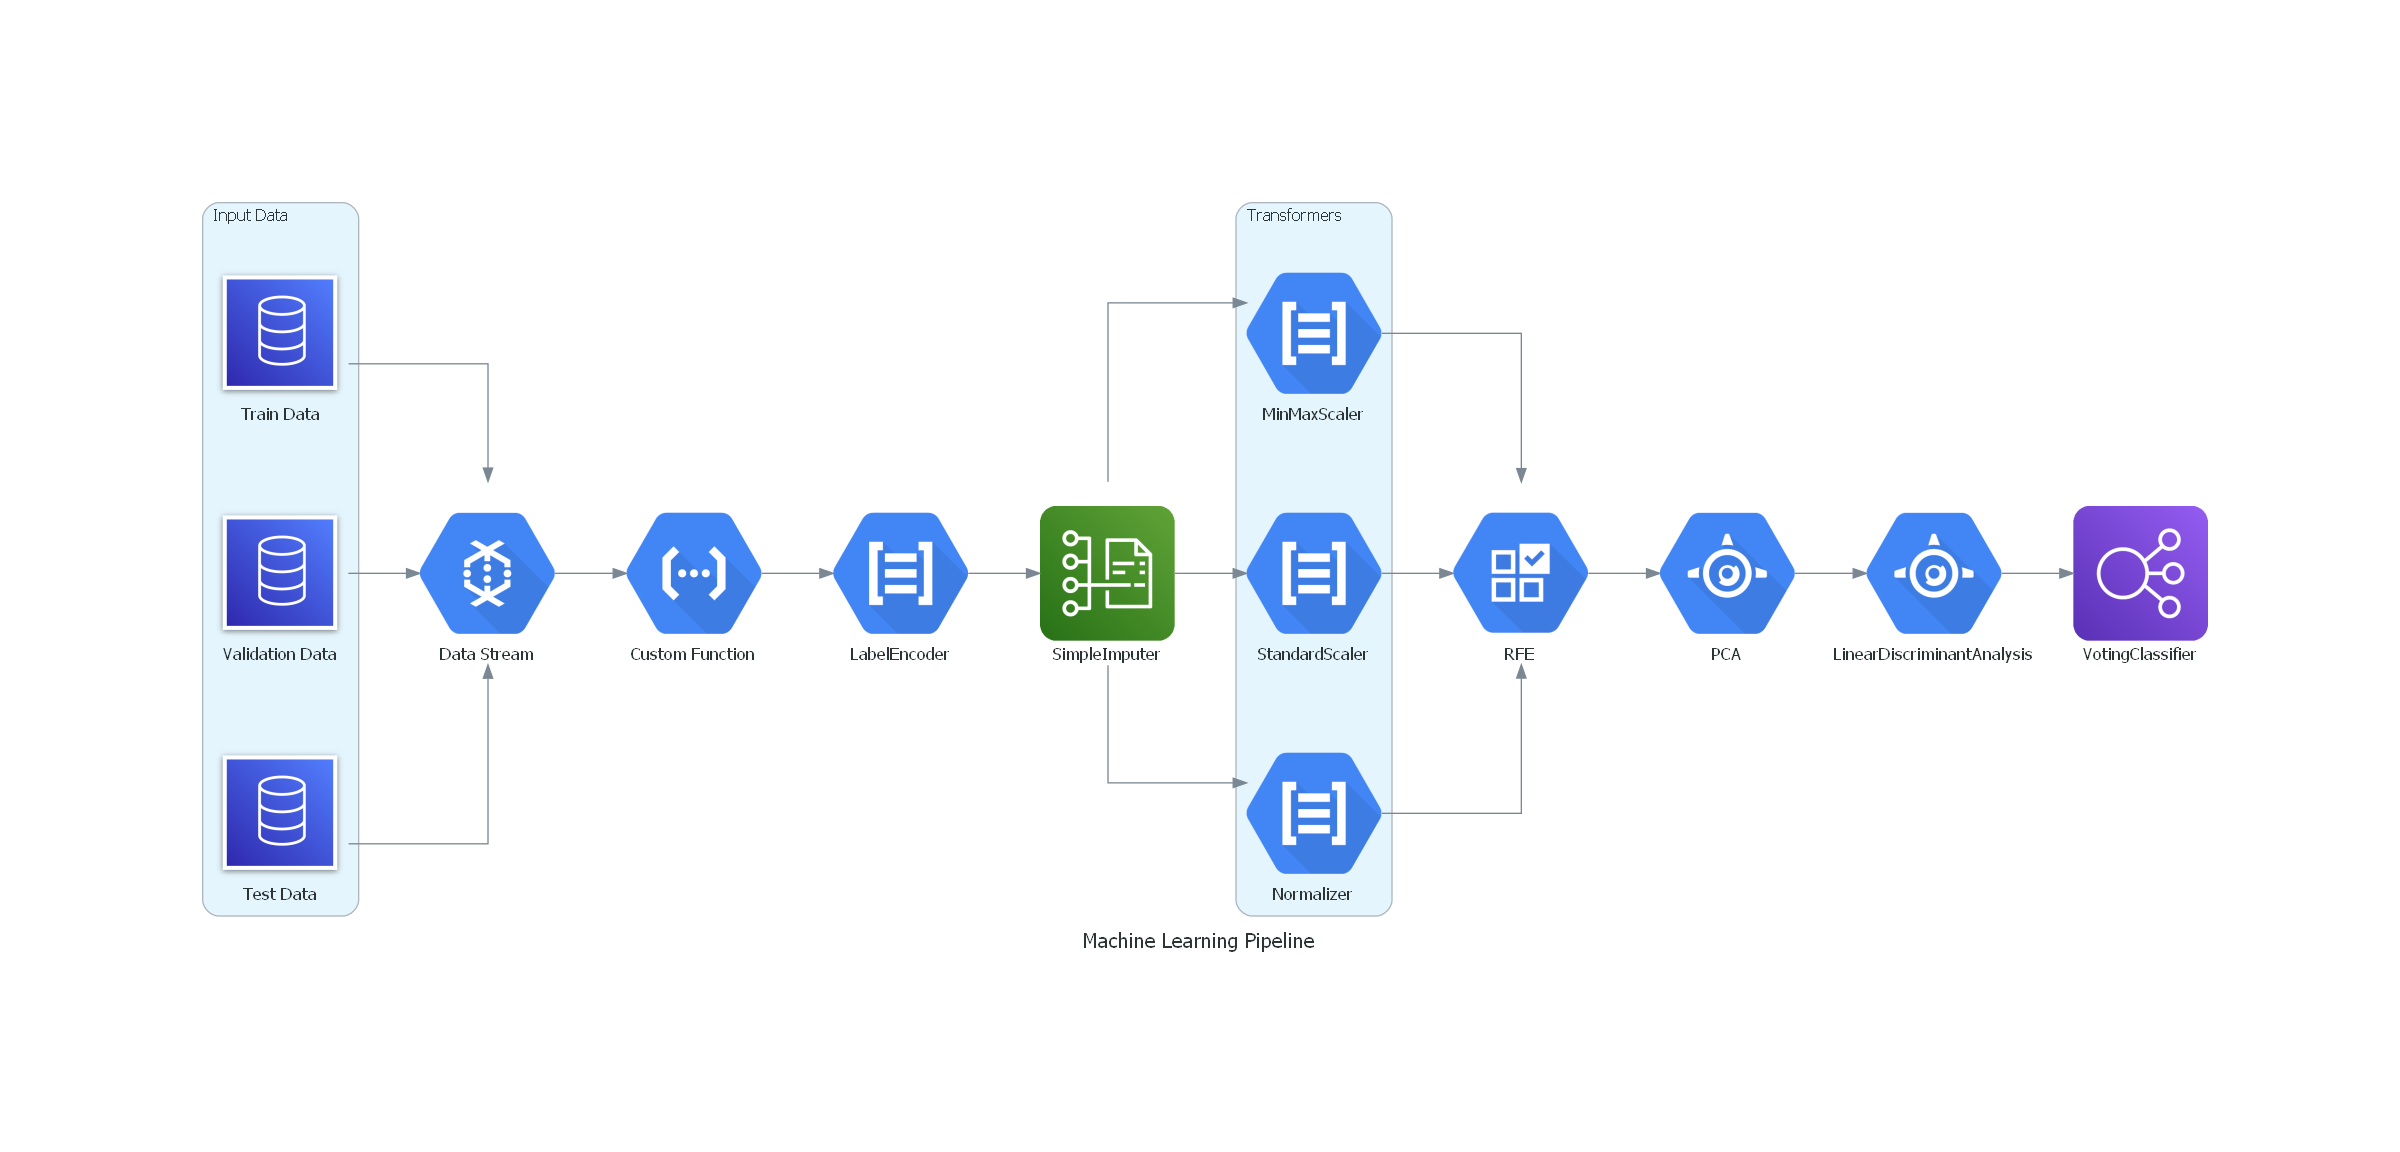

In [2]:
a = PipelineDiagram(pipeline)
#a.all_categories()
a.show()

In [4]:
import graphviz

g = graphviz.Digraph('G', filename='hello.png')

g.edge('Hello', 'World')

g.view()

'hello.png.pdf'